## Part 1
##### You must write a function or multiple functions to do the extraction, analyses, and visualization of your data. Using Numpy or Pandas to accomplish the reading in of the data.

In [1]:
# importing pandas, setting tmp_data for pandas to read csv file, then transfering file to numpy as data.
import pandas as pd
tmp_data = pd.read_csv('Dataset.csv')
data = tmp_data.to_numpy()

In [2]:
# just confirming I have the correct file
print(data)

[[161 'Baja' 'BR' ... 3.0 313.0 32.0]
 [170 'Baja' 'BR' ... 3.0 313.0 32.0]
 [162 'Baja' 'BR' ... 3.0 313.0 32.0]
 ...
 [5652 'Texas' 'HY' ... 215.0 215.0 230.0]
 [5653 'Texas' 'HY' ... 215.0 215.0 230.0]
 [5654 'Texas' 'HY' ... 215.0 215.0 230.0]]


In [41]:
# setting up a function that will print only the unique names from the Location list
def unique(num): 
    # Creating a list called cols that contains all the data from the col
    cols = (data[:, num]).tolist()
    # new empty list
    unique_list = [] 
    # for any city in col
    for ii in cols: 
        # it will be appended to list if it's not in unique list
        if ii not in unique_list: 
            unique_list.append(ii) 
    # returns the list
    return unique_list


In [42]:
print(unique(1)) # seeing the unique locations

['Baja', 'Mexico', 'Texas', 'Florida', 'Costa Rica (Mothers)', 'Honduras', 'Belize', nan, 'Cuba', 'South Carolina', 'Louisiana', 'North Carolina']


In [43]:
# setting a function that will count a list
def count(numb1, numb2): 
    # creating a new list of lists called bicols that has data from 2 cols
    bicols = (data[:, [numb1,numb2]]).tolist()
    # converting list of lists to list of tuples so it is easier for the program to find uniques/count. 
    bicols = [tuple(i) for i in bicols]
    check = False
    # need new empty list
    new_list = []   
    ii = 0
    # for loop checking if entry in new_list exists.
    for x in bicols: 
        if x in new_list:   
            check = True
            continue
        # if entry is not there it will append it, if there, it will not re-append it but will increase the count of ii
        else: 
            ii = 0
            #
            for y in bicols: 
                if y[0] == x[0] and y[1] == x[1]: 
                    ii = ii + 1
            # printing the number of occurences only for entries with multiple occurences        
            if(ii > 1):  
                print(x, "-", ii) 
            new_list.append(x)  
    if check == False: 
        # let's me know if an entry does not repeat
        print("No repeats")

In [44]:
# ran program successfully on Location_Species
count(1,2)

('Baja', 'BR') - 350
('Mexico', 'FU') - 656
('Texas', 'FU') - 92
('Florida', 'GE') - 289
('Florida', 'MN') - 126
('Costa Rica (Mothers)', 'OL') - 1028
('Honduras', 'OL') - 916
('Belize', 'OL') - 84
('Mexico', 'OL') - 1241
('Cuba', 'SA') - 120
('Florida', 'VI') - 475
('Texas', 'VI') - 34
('South Carolina', 'VI') - 100
('Louisiana', 'VI') - 60
('Mexico', 'VI') - 20
('North Carolina', 'VI') - 60
('Texas', 'HY') - 46


In [25]:
def mass_plotting(file, xdata, ystart, yend):
    # importing matplotlib.pyplot as plt since I need it later
    import matplotlib.pyplot as plt
    # creating a list of all the column names located in header
    header_list = list(file)
    # since there are several columns describing the climate an individual tree is in,
    # and I want to compare foliar area to all of them, I made a function to plot Foliar Area vs. all of the climate columns
    # for loop searches through columns 19-57 which are the climate ones
    for column in range(ystart, yend):
        column_list = (data[:, [xdata,column]]).tolist()
        # made a list of tuples in [(x,y)] format
        column_list = [tuple(i) for i in column_list]
        xval = [x[0] for x in column_list]
        yval = [y[1] for y in column_list]
        # plotted with appropriate x and y labels
        plt.scatter(xval,yval)
        plt.xlabel(header_list[xdata])
        plt.ylabel(header_list[column])
        plt.show()
    
    


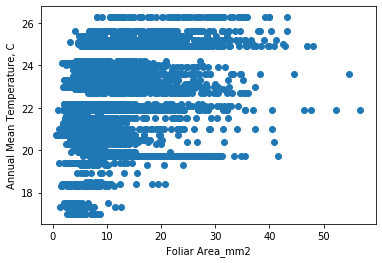

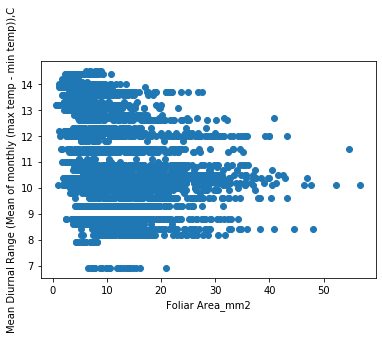

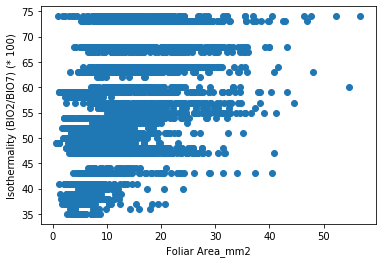

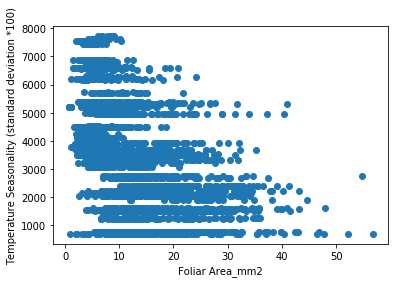

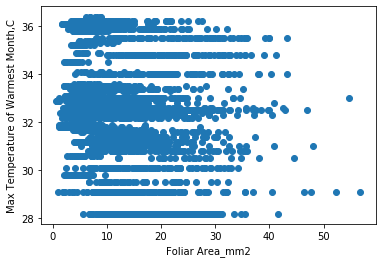

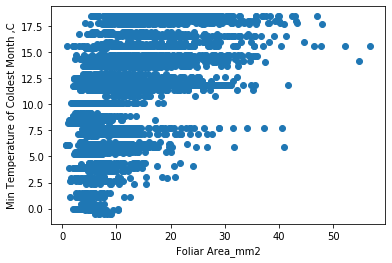

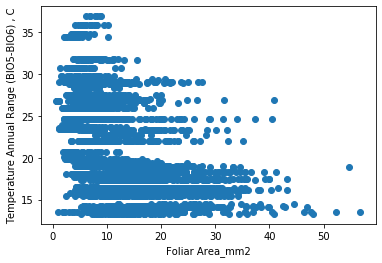

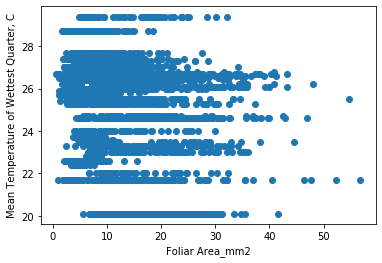

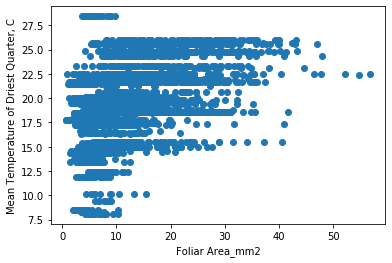

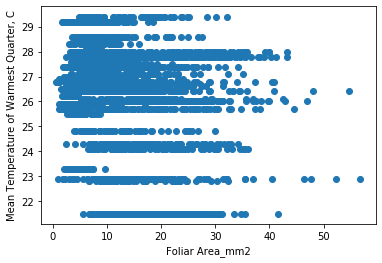

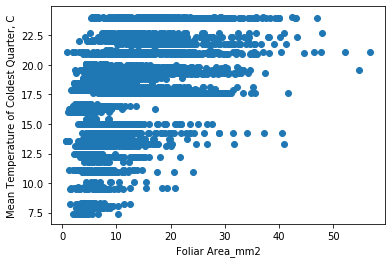

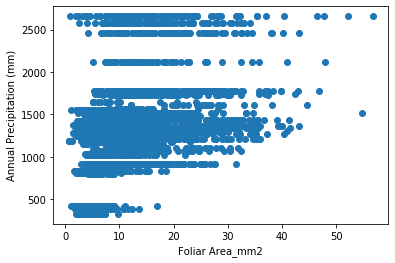

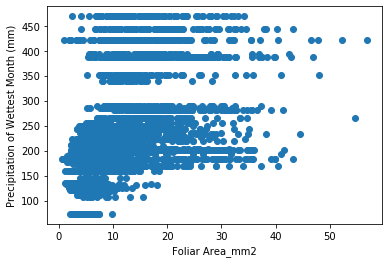

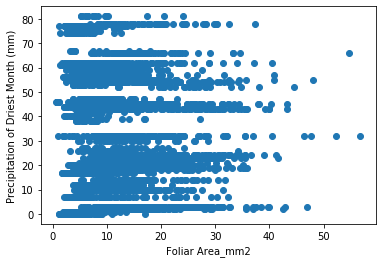

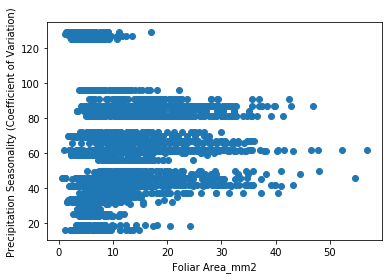

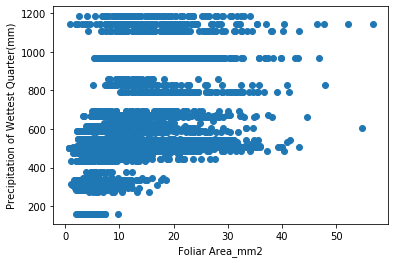

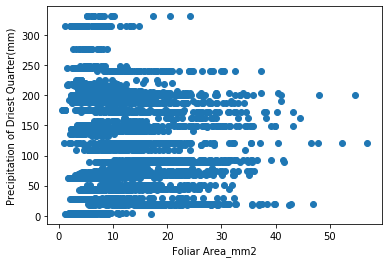

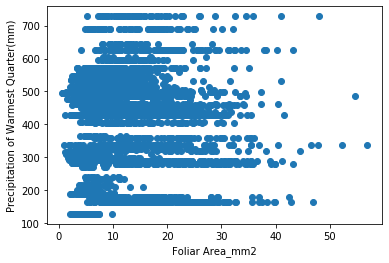

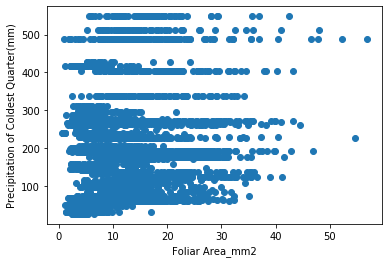

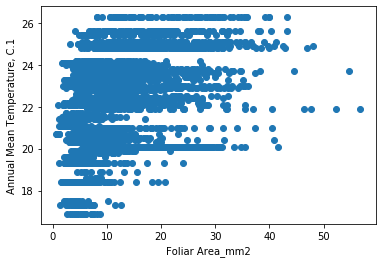

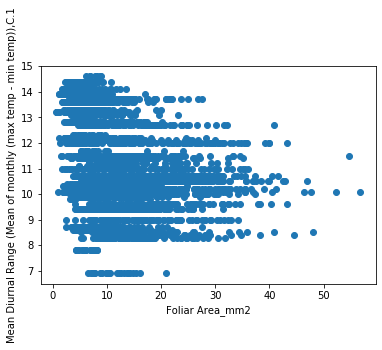

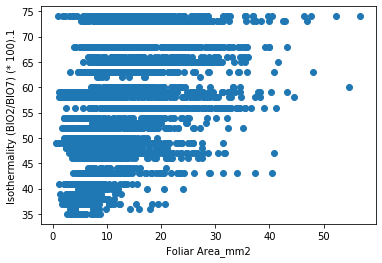

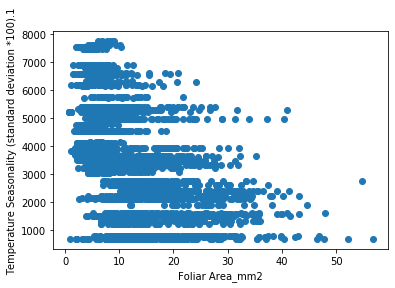

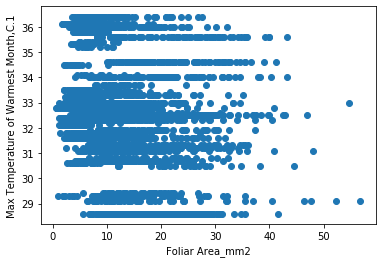

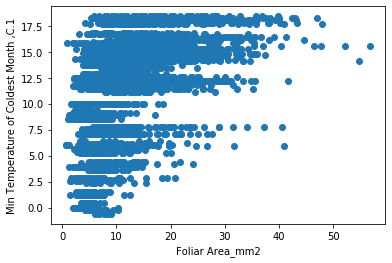

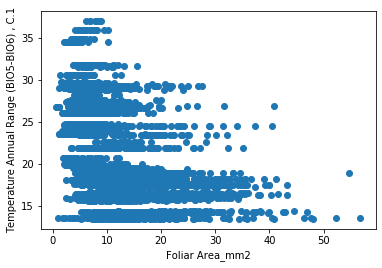

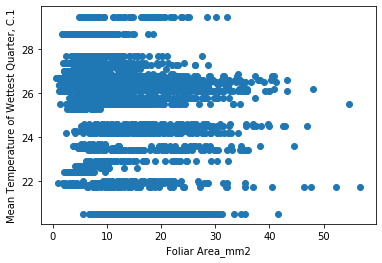

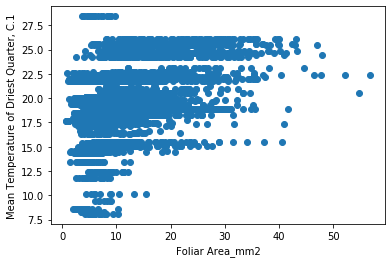

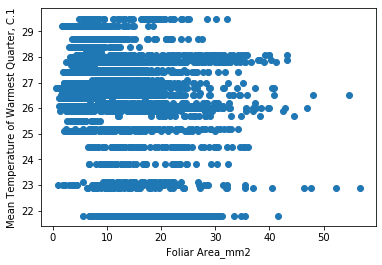

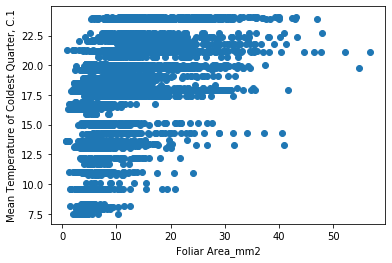

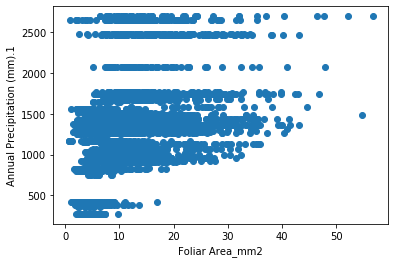

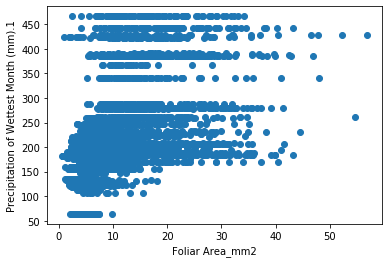

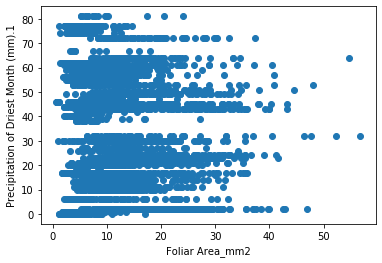

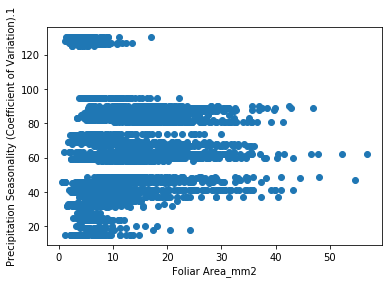

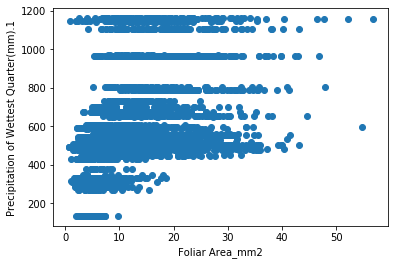

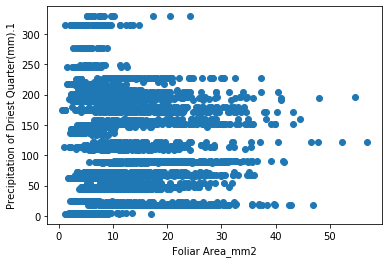

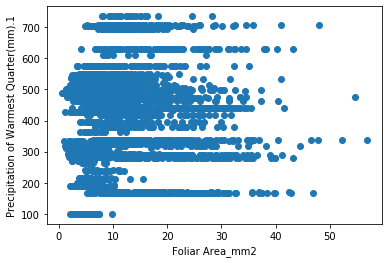

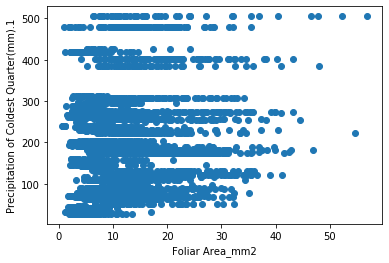

In [26]:
mass_plotting(tmp_data, 9, 19, 57)

## Part 2
#####  Show an alternative way of reading in the data. Take a look at the csv.DictReader function https://docs.python.org/3/library/ csv.html from the import csv module. Use this to then examine and manipulate your data in the form of a dictionary. Count the number of occurances and look into other useful functions of the dictionary that can help you organize your data.

In [30]:
# function below uses the csv module and DictReader to have every row be a dictionary where the keys are the header names.
# This function only goes to row 10 (which can be changed)
# it's useful to have in case I need this for any row I want. 
def open_with_dict(file):
    # importing csv module
    import csv
    with open(file) as f:
        # assigning shorter name to csv.DictReader(f)
        reader = csv.DictReader(f)
        for i, row in enumerate(reader):
            # printing key (header name) and value
            print(dict(row))
            # assignming breaks between dictionaries so it's easier to read
            print("\n")
            # this number is only to stop if from being two long, the actual file will be longer
            if i > 10:
                break

In [31]:
open_with_dict("Dataset.csv")

{'No.': '161', 'Location': 'Baja', 'Species': 'BR', 'Site': 'Sierra la Laguna', 'spp site code': 'BR_SL', 'Site Code': 'SL', 'DATA_NAME': 'BJSL29_1', 'Individual': 'BJSL29', 'Leaf': '1', 'Foliar Area_mm2': '4.46E+02', 'Latitude': '23.4953', 'Longitude': '-110.062', 'PC1': '-7.05E-04', 'PC2': '-9.70E-02', 'PC3': '-2.21E-03', 'PC4': '4.15E-02', 'PC5': '-2.50E-02', 'PC6': '5.89E-03', 'Annual Mean Temperature, C': '21.4', 'Mean Diurnal Range (Mean of monthly (max temp - min temp)),C': '13.9', 'Isothermality (BIO2/BIO7) (* 100)': '59', 'Temperature Seasonality (standard deviation *100)': '3811', 'Max Temperature of Warmest Month,C': '32.4', 'Min Temperature of Coldest Month ,C': '8.9', 'Temperature Annual Range (BIO5-BIO6) , C': '23.5', 'Mean Temperature of Wettest Quarter, C': '26.4', 'Mean Temperature of Driest Quarter, C': '22', 'Mean Temperature of Warmest Quarter, C': '26.4', 'Mean Temperature of Coldest Quarter, C': '16.7', 'Annual Precipitation (mm)': '416', 'Precipitation of Wettest

In [33]:
# A lot of the climate data had the same values since many came from the same area
# I want to count all the occurances for a value for all the climate data columns
# This function counts the occurances for columns 9-56, and pushes the counts to a dictionary for each column
def count_to_dict(file, ystart, yend):
    for column in range(ystart,yend):
        header_list = list(file)
        # for loop searches through columns 19-57 which are the climate ones
        column_list = file["{}".format(header_list[column])].tolist() # {}.format used since column names change
        count_dict = dict() # new dict
        # for loop finds all the occurances of an element and assigns the value as frequency of the element (key)
        for ii in column_list:
            count_dict[ii] = count_dict.get(ii, 0) + 1
        print(count_dict) # printing dict for one column
        print("\n") # helps to space them out

In [34]:
count_to_dict(tmp_data, 19, 57)

{21.0: 210, 20.7: 176, 21.1: 20, 21.3: 80, 21.6: 20, 21.5: 157, 23.8: 80, 24.1: 308, 21.7: 10, 22.1: 165, 22.2: 122, 18.4: 178, 17.5: 20, 18.5: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 23.3: 219, 20.4: 20, 20.3: 167, 19.9: 72, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 23.0: 118, 21.9: 162, 25.0: 100, 24.9: 405, 22.7: 84, 19.7: 242, 23.1: 93, 26.3: 81, 23.6: 104, 25.2: 118, 25.6: 119, 23.9: 135, 22.9: 328, 25.4: 67, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 

{31.9: 100, 31.8: 89, 32.4: 315, 32.6: 150, 33.0: 231, 33.1: 100, 31.7: 80, 36.1: 308, 34.9: 10, 35.9: 131, 36.2: 94, 29.8: 100, 35.2: 20, 35.8: 37, 34.5: 20, 36.4: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 32.5: 456, 33.5: 58, 32.8: 148, 32.9: 202, 32.3: 130, 33.4: 154, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 29.1: 162, 29.5: 57, 30.8: 84, 28.2: 242, 32.2: 83, 35.5: 81, 30.5: 24, 31.0: 60, 34.8: 118, 34.0: 119, 30.1: 101, 31.4: 78, 31.6: 84, 31.2: 328, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 

{21.7: 242, 21.5: 50, 19.5: 328, 19.6: 161, 19.8: 87, 20.0: 182, 21.8: 80, 16.5: 10, 15.0: 158, 13.7: 100, 8.3: 20, 8.1: 18, 8.5: 20, 9.4: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 18.5: 85, 17.7: 28, 17.8: 126, 15.5: 95, 15.4: 35, 17.3: 20, 17.2: 149, 16.3: 4, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 18.0: 40, 22.5: 162, 25.7: 70, 25.6: 345, 20.6: 57, 18.6: 242, 21.9: 147, 26.0: 81, 23.1: 24, 24.3: 60, 24.7: 118, 24.9: 119, 23.3: 101, 22.4: 80, 20.1: 71, 19.4: 164, 18.8: 388, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1

{0.0: 150, 1.0: 200, 12.0: 80, 17.0: 308, 20.0: 302, 7.0: 157, 46.0: 73, 43.0: 99, 40.0: 20, 41.0: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 61.0: 106, 62.0: 189, 44.0: 28, 47.0: 73, 57.0: 120, 55.0: 209, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 56.0: 40, 32.0: 162, 2.0: 70, 3.0: 345, 19.0: 84, 23.0: 242, 18.0: 63, 52.0: 24, 24.0: 148, 45.0: 192, 54.0: 101, 78.0: 78, 66.0: 80, 14.0: 84, 10.0: 328, 21.0: 67, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 

{31.0: 80, 51.0: 50, 49.0: 20, 47.0: 80, 27.0: 20, 44.0: 100, 67.0: 147, 70.0: 402, 75.0: 10, 68.0: 64, 33.0: 100, 150.0: 20, 144.0: 18, 145.0: 20, 133.0: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 199.0: 21, 201.0: 64, 159.0: 28, 238.0: 73, 240.0: 53, 230.0: 95, 232.0: 35, 269.0: 20, 277.0: 149, 298.0: 4, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 192.0: 40, 487.0: 162, 548.0: 70, 194.0: 345, 64.0: 57, 139.0: 84, 177.0: 242, 98.0: 63, 273.0: 136, 262.0: 44, 512.0: 60, 125.0: 118, 403.0: 119, 337.0: 101, 265.0: 78, 228.0: 90, 171.0: 51, 91.0: 30, 85.0: 84, 74.0: 134, 62.0: 328, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, na

{3811.0: 80, 3824.0: 50, 3935.0: 20, 3908.0: 70, 3923.0: 10, 3886.0: 10, 3934.0: 10, 4072.0: 20, 4119.0: 80, 3439.0: 80, 4542.0: 308, 4795.0: 10, 5278.0: 64, 5411.0: 94, 4740.0: 100, 7481.0: 20, 7615.0: 18, 7531.0: 20, 7747.0: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 3494.0: 4, 3500.0: 26, 3491.0: 18, 3508.0: 13, 4125.0: 20, 5210.0: 6, 5215.0: 26, 5214.0: 42, 5226.0: 11, 4973.0: 3, 4955.0: 3, 4986.0: 13, 4993.0: 22, 5293.0: 20, 5336.0: 81, 5343.0: 13, 5381.0: 8, 5736.0: 4, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 3519.0: 17, 3506.0: 7, 4128.0: 8, 3662.0: 20, 3653.0: 1, 673.0: 72, 672.0: 43, 680.0: 47, 746.0: 70, 779.0: 286,

{26.4: 224, 26.1: 225, 26.7: 391, 26.6: 264, 27.0: 38, 26.9: 130, 27.3: 110, 28.7: 308, 25.7: 10, 25.8: 355, 22.4: 120, 22.7: 18, 21.8: 20, 22.9: 64, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 27.4: 155, 26.8: 264, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 21.9: 72, 22.0: 43, 21.7: 47, 24.5: 356, 24.6: 59, 23.4: 84, 20.5: 242, 24.3: 63, 23.6: 33, 26.2: 60, 26.5: 206, 24.2: 101, 25.5: 110, 26.3: 249, 29.5: 67, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 

{416.0: 80, 421.0: 50, 387.0: 20, 375.0: 70, 385.0: 10, 386.0: 10, 361.0: 10, 402.0: 100, 1023.0: 80, 817.0: 308, 752.0: 10, 917.0: 64, 920.0: 94, 270.0: 100, 829.0: 20, 825.0: 18, 800.0: 20, 798.0: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 1419.0: 4, 1423.0: 26, 1421.0: 31, 1253.0: 28, 1170.0: 6, 1167.0: 26, 1171.0: 42, 1164.0: 11, 1270.0: 16, 1268.0: 3, 1269.0: 22, 1310.0: 38, 1333.0: 89, 1332.0: 60, 1345.0: 4, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 1418.0: 9, 1417.0: 15, 1347.0: 20, 1346.0: 21, 2647.0: 72, 2646.0: 43, 2696.0: 47, 1746.0: 70, 1749.0: 286, 1760.0: 19, 1767.0: 40, 995.0: 57, 1128.0: 84, 1359.0: 242, 1271.0

{313.0: 80, 317.0: 67, 294.0: 20, 284.0: 70, 292.0: 10, 293.0: 10, 271.0: 20, 303.0: 100, 608.0: 80, 334.0: 308, 326.0: 10, 444.0: 158, 135.0: 100, 283.0: 40, 291.0: 18, 288.0: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 515.0: 4, 513.0: 50, 514.0: 31, 590.0: 28, 495.0: 6, 493.0: 26, 494.0: 42, 492.0: 11, 485.0: 108, 484.0: 22, 533.0: 20, 547.0: 149, 511.0: 4, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 498.0: 40, 1145.0: 72, 1143.0: 43, 1157.0: 47, 964.0: 356, 967.0: 19, 968.0: 40, 454.0: 57, 476.0: 84, 554.0: 242, 588.0: 63, 506.0: 81, 655.0: 102, 806.0: 60, 787.0: 118, 1105.0: 119, 1161.0: 101, 595.0: 80, 731.0: 51, 969.0: 30,

## Part 3
#####  Read this page https://pyformat.info/, this page https: //realpython.com/python-string-formatting/, and Chapter 5 of the Introduction to Python book for information on the New Style Formatting in Python. Using the .format() function in Python, create another output ﬁle that extracts and modiﬁes the original data and save this data into a text ﬁle as output, making use of the .format() function to change how the data are output to the ﬁle. Make sure to show in your code what you did and why. 

In [13]:
# Any data that I want outputted might have multiple files, so I need two directories, one where I recieve the dat
# the other where I write too
# in this case I want to save all the plots I created earlier to their own folder
import os
datapath = "/home/eebc177student/Developer/repos/eeb-c177-project/analyses"
workingdir = "/home/eebc177student/Developer/repos/eeb-c177-project/analyses/Plots"
os.chdir(datapath)

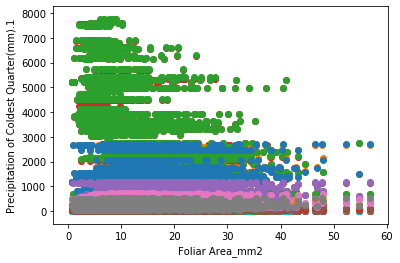

In [14]:
# similiar function to the one in part 1, but this one saves the plots with a unique name (by column number)
# all are saved under the folder Plots as .png files
for column in range(19,57):
    column_list = (data[:, [9,column]]).tolist()
    column_list = [tuple(i) for i in column_list]
    xval = [x[0] for x in column_list]
    yval = [y[1] for y in column_list]

    plt.scatter(xval,yval)
    plt.xlabel(header_list[9])
    plt.ylabel(header_list[column])
    os.chdir(workingdir)
    plt.savefig("Foliar_Area_vs_{}".format(column))
    os.chdir(datapath)
os.chdir(datapath)

In [15]:
# Using my unique program to find the unique species values
Species = tmp_data.Species.tolist()
Unique_Species = []
def unique(Species): 
    unique_list = [] 
    for ii in Species: 
        if ii not in unique_list: 
            unique_list.append(ii) 
    for ii in unique_list: 
        Unique_Species.append(ii)
        print(ii)
unique(Species)

BR
FU
GE
MN
OL
SA
VI
HY


In [16]:
# set unique species as list before and checking list
print(Unique_Species)

['BR', 'FU', 'GE', 'MN', 'OL', 'SA', 'VI', 'HY']


In [17]:
# updating my directories
datapath = "/home/eebc177student/Developer/repos/eeb-c177-project/analyses"
workingdir = "/home/eebc177student/Developer/repos/eeb-c177-project/analyses/Extracted_Species_Datasets"
os.chdir(datapath)

In [18]:
# Saving the data from each species seperately in Extracted_Species_Datasets
for spec in range(0,len(Unique_Species)):
    os.chdir(datapath)
    with open("Dataset.csv") as fr:
            reader = csv.DictReader(fr)
            header = reader.fieldnames
            os.chdir(workingdir)
            with open("{}_Dataset.csv".format(Unique_Species[spec]), "w") as fw:
                writer = csv.DictWriter(fw, fieldnames = header, delimiter = ",")
                os.chdir(datapath)
                for row in reader:
                    if row["Species"] == "{}".format(Unique_Species[spec]):
                        writer.writerow(row)